<a href="https://colab.research.google.com/github/louzeiro/trabalhosUSP/blob/main/Projeto_final_Flaviane.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto Final 

Flaviane Louzeiro da Silva - nUSP: 11885075


As fases envolvidas neste projeto podem ser resumidas nos seguintes passos:<br>
1 - Formulação do problema e preparo dos dados.<br>
2 - Limpeza e normalização dos dados<br>
3 - Análise exploratória, Estatística Descritiva, PCA.<br>
4 - Aprendizado supervisionado através da validação cruzada (conjunto de teste).<br>
5 - Treinamento do modelo com todos os dados de treinamento.<br>
6 - Predição dos valores no conjunto de teste. <br>
7 - Avaliação do modelo.<br>
8 - Interpretação dos resultados.

## 1 - Formulação do problema 

Descrição do dataset:

Será utilizado o conjunto de dados Statlog (German Credit Data) Data Set, [disponível no site UCI](https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)). Esse conjunto de dados classifica as pessoas descritas por um conjunto de atributos como riscos de crédito bons ou ruins. 
Na tabela abaixo estão as características do dataset.

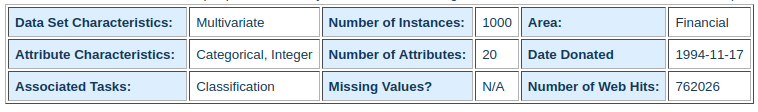


Descrição dos atributos: <br>

* Attribute 1: Status of existing checking account (qualitativa) <br>
* Attribute 2: Duration in month (numérica)
* Attribute 3: Credit history (qualitativa)
* Attribute 4: Purpose (qualitativa)
* Attribute 5: Credit amount (numérica)
* Attibute 6: Savings account/bonds (qualitativa)
* Attribute 7: Present employment since (qualitativa)
* Attribute 8: Installment rate in percentage of disposable income (numérica)
* Attribute 9: Personal status and sex (qualitativa)
* Attribute 10: Other debtors / guarantors (qualitativa)
* Attribute 11: Present residence since (numérica)
* Attribute 12: Property (qualitativa)
* Attribute 13: Age in years (numérica)
* Attribute 14: Other installment plans (qualitativa)
* Attribute 15: Housing (qualitativa)
* Attribute 16: Number of existing credits at this bank (numérica)
* Attribute 17: Job (qualitativa)
* Attribute 18: Number of people being liable to provide maintenance (numérica)
* Attribute 19: Telephone (qualitativa)
* Attribute 20: foreign worker (qualitativa)



## 2- Preparo dos dados.

Importe das Bibliotecas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from yellowbrick.classifier import ConfusionMatrix 
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn.tree import export_graphviz
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier


Leitura dos dados

In [ ]:
credito = pd.read_csv('Credit.csv')
credito.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,4,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,2,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,3,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,4,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,4,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


Verificando o total de valores nulos por atributo

In [ ]:
print(credito.isnull().sum())

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64


Verificando o tipo de dados de cada atributo

In [ ]:
print(credito.dtypes)

checking_status           object
duration                   int64
credit_history            object
purpose                   object
credit_amount              int64
savings_status            object
employment                object
installment_commitment     int64
personal_status           object
other_parties             object
residence_since            int64
property_magnitude        object
age                        int64
other_payment_plans       object
housing                   object
existing_credits           int64
job                       object
num_dependents             int64
own_telephone             object
foreign_worker            object
class                     object
dtype: object


Separando os atributos e as classes

In [ ]:
previsores = credito.iloc[:,0:20].values
classe = credito.iloc[:,20].values

Transformação dos atributos categóricos em atributos numéricos, passando o índice de cada coluna categórica.

In [ ]:
labelencoder1 = LabelEncoder()
previsores[:,0] = labelencoder1.fit_transform(previsores[:,0])

labelencoder2 = LabelEncoder()
previsores[:,2] = labelencoder2.fit_transform(previsores[:,2])

labelencoder3 = LabelEncoder()
previsores[:, 3] = labelencoder3.fit_transform(previsores[:, 3])

labelencoder4 = LabelEncoder()
previsores[:, 5] = labelencoder4.fit_transform(previsores[:, 5])

labelencoder5 = LabelEncoder()
previsores[:, 6] = labelencoder5.fit_transform(previsores[:, 6])

labelencoder6 = LabelEncoder()
previsores[:, 8] = labelencoder6.fit_transform(previsores[:, 8])

labelencoder7 = LabelEncoder()
previsores[:, 9] = labelencoder7.fit_transform(previsores[:, 9])

labelencoder8 = LabelEncoder()
previsores[:, 11] = labelencoder8.fit_transform(previsores[:, 11])

labelencoder9 = LabelEncoder()
previsores[:, 13] = labelencoder9.fit_transform(previsores[:, 13])

labelencoder10 = LabelEncoder()
previsores[:, 14] = labelencoder10.fit_transform(previsores[:, 14])

labelencoder11 = LabelEncoder()
previsores[:, 16] = labelencoder11.fit_transform(previsores[:, 16])

labelencoder12 = LabelEncoder()
previsores[:, 18] = labelencoder12.fit_transform(previsores[:, 18])

labelencoder13 = LabelEncoder()
previsores[:, 19] = labelencoder13.fit_transform(previsores[:, 19])

Convertendo os dados para o formato numpy e normalizando-os

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(previsores)
previsores = scaler.transform(previsores)

print('Dados transformados:')
print('Media: ', np.mean(previsores, axis = 0))
print('Desvio Padrao:', np.std(previsores, axis = 0))

Dados transformados:
Media:  [ 2.84217094e-17 -1.06581410e-17  3.55271368e-18  2.13162821e-17
 -1.15463195e-17  2.48689958e-17  4.61852778e-17 -5.32907052e-18
  3.55271368e-18 -7.10542736e-17  6.03961325e-17  3.19744231e-17
  2.48689958e-17 -1.59872116e-17  4.08562073e-17  7.99360578e-17
  3.19744231e-17 -1.77635684e-17 -1.10134124e-16 -9.23705556e-17]
Desvio Padrao: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Verificando se as classes estão balanceadas

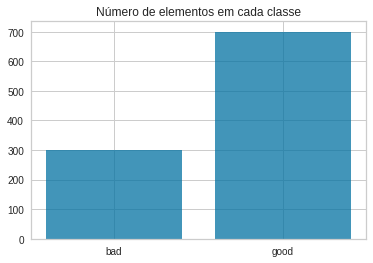

In [ ]:
classes = classe #credito.iloc[:,20].values
cl = np.unique(classes)
ncl = np.zeros(len(cl))
for i in np.arange(0, len(cl)):
    a = classes == cl[i]
    ncl[i] = len(classes[a])
    
numbers = np.arange(0, len(cl))
plt.bar(numbers, ncl,  alpha=.75)
plt.xticks(numbers, cl)
plt.title('Número de elementos em cada classe')
plt.show(True)

Observa-se que há mais pessoas com a classificação *good* do que pessoas com a classificação *bad*

## Análise descritiva dos dados

visualizando a dispersão das classes realizando a projeção dos atributos em duas dimensões usando PCA.

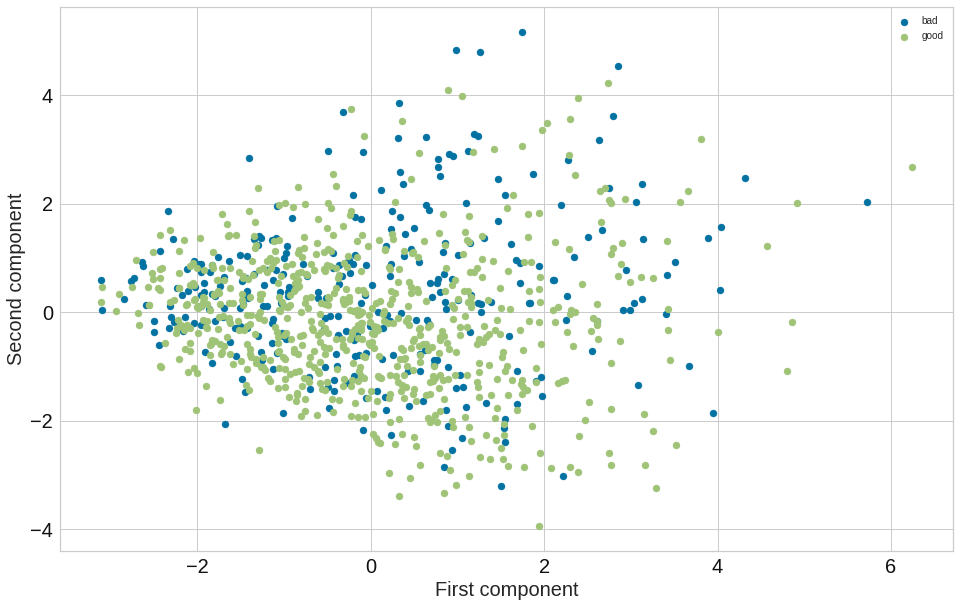

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(previsores)

classes = classe
tipo_classe = np.unique(classes)

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
aux = 0
plt.figure(figsize=(16,10))
for c in tipo_classe:
    nodes = np.where(classes == c)
    plt.scatter(pca_result[nodes,0], pca_result[nodes,1], s=50, color = colors[aux], label = c)
    aux = aux + 1
plt.legend()
plt.xlabel("First component", fontsize=20)
plt.ylabel("Second component", fontsize=20)
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.show(True)

Verificando os atributos que mais explicam a variância nos dados

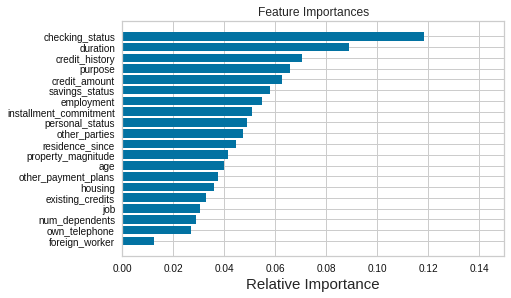

In [ ]:
pca = PCA()
pca_result = pca.fit_transform(previsores)
var_exp = pca.explained_variance_ratio_

importances = var_exp
attributes = credito.iloc[:,0:20].columns
indices = np.argsort(importances)
attributes_rank = []
for i in indices:
    attributes_rank.append(attributes[i])
plt.title('Feature Importances')
plt.tight_layout()
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), attributes_rank, fontsize=25)
plt.xlabel('Relative Importance',fontsize=15)
plt.xticks(color='k', size=10)
plt.yticks(color='k', size=10)
plt.xlim([0.0, 0.15])
plt.show()

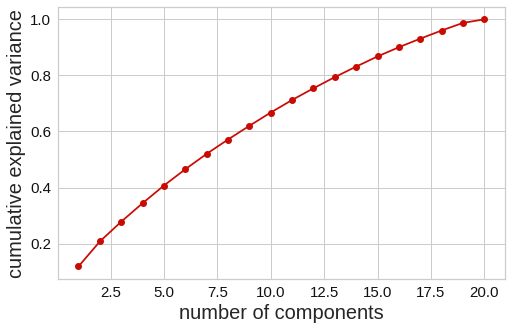

In [ ]:
pca = PCA().fit(previsores)
plt.figure(figsize=(8,5))
ncomp = np.arange(1, np.shape(previsores)[1]+1)
plt.plot(ncomp, np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('number of components', fontsize=20)
plt.ylabel('cumulative explained variance', fontsize=20);
plt.xticks(color='k', size=15)
plt.yticks(color='k', size=15)
plt.grid(True)
plt.show(True)

Observa-se que, 90% dos dados são explicados com 15 atributos e dessa forma, será considerado todos os compoententes.

Análise do nível de correlação nos dados

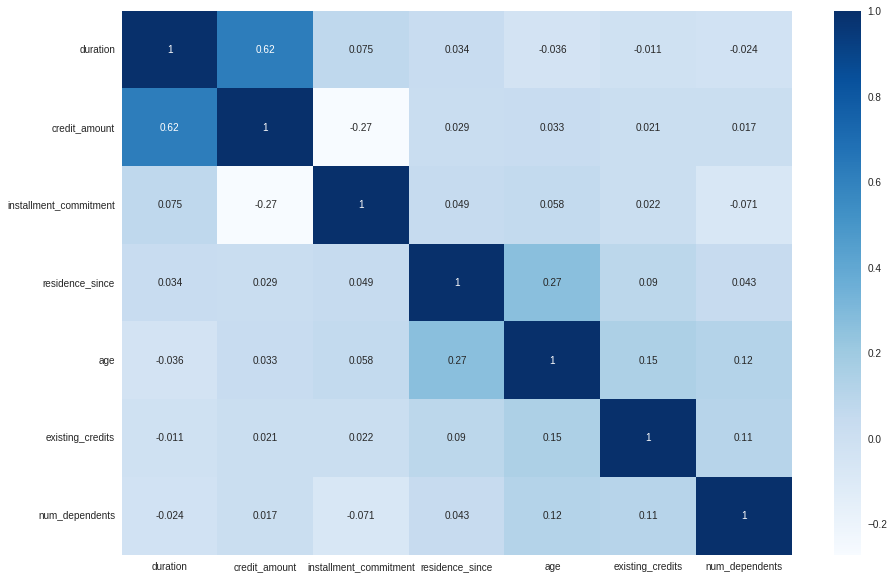

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(credito.corr(), annot=True, cmap='Blues')

Observa-se que a maioria dos dados não são fortemente correlacionados, apenas *credit_amount* apresentou correlação acima de 0,5.

## Classificação

In [ ]:
X = previsores
y = credito['class'].replace({'good':1, 'bad':0})
taxas_acertos = []

### SVM

Melhor c: 18  AUC: 0.6490476190476191


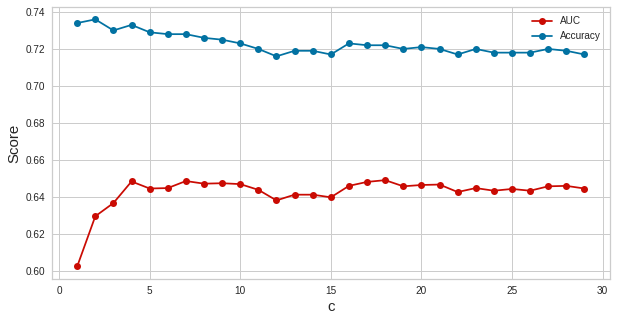

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
#cv = KFold(n_splits=10)
# enumerate the splits and summarize the distributions
mauc = []
macc = []
vc = []
for c in range(1, 30):
    vauc = []
    vacc = []
    for train_index, test_index in cv.split(X, y):
        # select rows
        x_train, x_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model = SVC(C = c, gamma = 'auto')
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test) 
        score = accuracy_score(y_pred, y_test)

        vauc.append(roc_auc_score(y_test, y_pred))
        vacc.append(accuracy_score(y_pred, y_test))
    macc.append(np.mean(vacc))
    mauc.append(np.mean(vauc))
    vc.append(c)
    #print('k:', k)
    #print('Average accuracy:', np.mean(vacc))
    #print('Average AUC:', np.mean(vauc))
best_c = np.argmax(mauc)+1
print('Melhor c:', best_c, ' AUC:',mauc[best_c-1])
plt.figure(figsize=(10,5))
plt.plot(vc, mauc, '-ro', label= 'AUC')
plt.plot(vc, macc, '-bo', label = 'Accuracy')
plt.xlabel('c', fontsize = 15)
plt.ylabel('Score', fontsize = 15)
plt.legend()
plt.show()

Previsão 

Taxa de acerto 0.7166666666666667 %


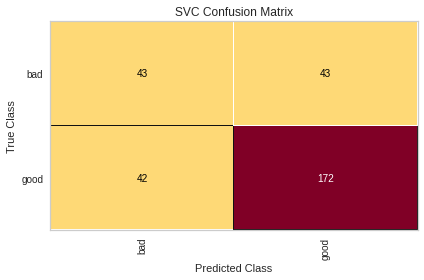

In [ ]:
x_train, X_test, y_train, y_test = train_test_split(previsores, classe, test_size = 0.3, random_state = 0)
model = SVC(C = best_c, gamma = 'auto')
model.fit(x_train,y_train)
y_pred = model.predict(X_test) 

taxa_acerto = accuracy_score(y_test, y_pred)
taxas_acertos.append(taxa_acerto)
print('Taxa de acerto', taxa_acerto,'%')

v = ConfusionMatrix(SVC(C = best_c, gamma = 'auto'))
v.fit(x_train, y_train)
v.score(X_test, y_test)
v.poof()

### KNeighbors

Melhor k: 10  AUC: 0.6328571428571428


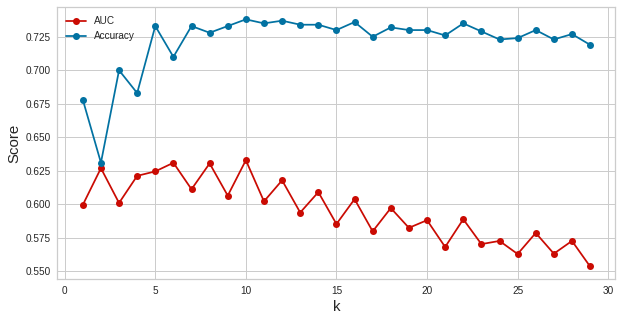

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
#cv = KFold(n_splits=10)
# enumerate the splits and summarize the distributions
mauc = []
macc = []
vk = []
for k in range(1, 30):
    vauc = []
    vacc = []
    for train_index, test_index in cv.split(X, y):
        # select rows
        x_train, x_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test) 
        score = accuracy_score(y_pred, y_test)

        vauc.append(roc_auc_score(y_test, y_pred))
        vacc.append(accuracy_score(y_pred, y_test))
    macc.append(np.mean(vacc))
    mauc.append(np.mean(vauc))
    vk.append(k)
    #print('k:', k)
    #print('Average accuracy:', np.mean(vacc))
    #print('Average AUC:', np.mean(vauc))
best_k = np.argmax(mauc)+1
print('Melhor k:', best_k, ' AUC:',mauc[best_k-1])
plt.figure(figsize=(10,5))
plt.plot(vk, mauc, '-ro', label= 'AUC')
plt.plot(vk, macc, '-bo', label = 'Accuracy')
plt.xlabel('k', fontsize = 15)
plt.ylabel('Score', fontsize = 15)
plt.legend()
plt.show()

Escolhido o melhor K, agora será aplicado no modelo e então será visualizado a matriz de confusão

Taxa de acerto 0.7366666666666667 %


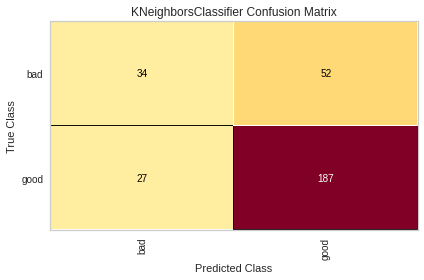

In [ ]:
x_train, X_test, y_train, y_test = train_test_split(previsores, classe, test_size = 0.3, random_state = 0)
model = KNeighborsClassifier(n_neighbors=best_k, metric = 'euclidean')
model.fit(x_train,y_train)
y_pred = model.predict(X_teste) 

taxa_acerto = accuracy_score(y_test, y_pred)
taxas_acertos.append(taxa_acerto)
print('Taxa de acerto', taxa_acerto,'%')

v = ConfusionMatrix(KNeighborsClassifier(n_neighbors=best_k, metric = 'euclidean'))
v.fit(x_train, y_train)
v.score(X_test, y_test)
v.poof()

### Random Florest

Melhor n: 13  AUC: 0.6628571428571429


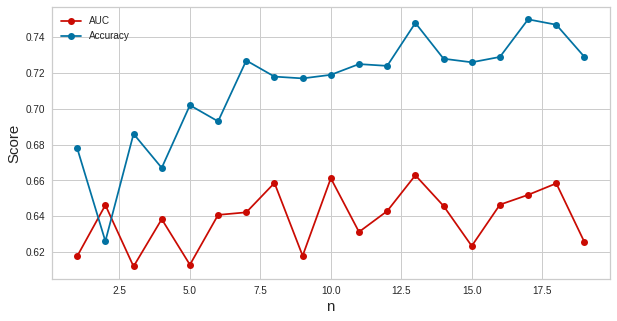

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
#cv = KFold(n_splits=10)
# enumerate the splits and summarize the distributions
mauc = []
macc = []
vn = []
for n in range(1, 20, 1):
    vauc = []
    vacc = []
    for train_index, test_index in cv.split(X, y):
        # select rows
        x_train, x_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model = RandomForestClassifier(n_estimators=n)
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test) 
        score = accuracy_score(y_pred, y_test)

        vauc.append(roc_auc_score(y_test, y_pred))
        vacc.append(accuracy_score(y_pred, y_test))
    macc.append(np.mean(vacc))
    mauc.append(np.mean(vauc))
    vn.append(n)
best_n = np.argmax(mauc)+1
print('Melhor n:', best_n, ' AUC:',mauc[best_n-1])
plt.figure(figsize=(10,5))
plt.plot(vn, mauc, '-ro', label= 'AUC')
plt.plot(vn, macc, '-bo', label = 'Accuracy')
plt.xlabel('n', fontsize = 15)
plt.ylabel('Score', fontsize = 15)
plt.legend()
plt.show()

Escolhido o melhor n, agora visualizando a matriz de confusão

Taxa de acerto 0.8 %


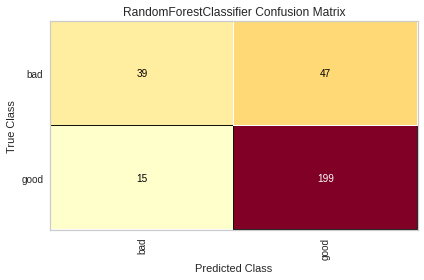

In [ ]:
x_train, X_test, y_train, y_test = train_test_split(previsores, classe, test_size = 0.3, random_state = 0)
model = RandomForestClassifier(n_estimators=best_n)
model.fit(x_train,y_train)
y_pred = model.predict(X_teste) 

taxa_acerto = accuracy_score(y_test, y_pred)
taxas_acertos.append(taxa_acerto)
print('Taxa de acerto', taxa_acerto,'%')

v = ConfusionMatrix(RandomForestClassifier(n_estimators=best_n))
v.fit(x_train, y_train)
v.score(X_test, y_test)
v.poof()

### Naive Bayes
Para esse classificador não será utilizado o k fold pois ele não precisa otimizar os parâmetros como os citados anteriormente

In [ ]:
x_train, X_test, y_train, y_test = train_test_split(previsores, classe, test_size = 0.3, random_state = 0)
naive_bayes = GaussianNB()
naive_bayes.fit(x_train, y_train)

GaussianNB()

Taxa de acerto e matriz de confusão

Taxa de acerto 0.6933333333333334 %


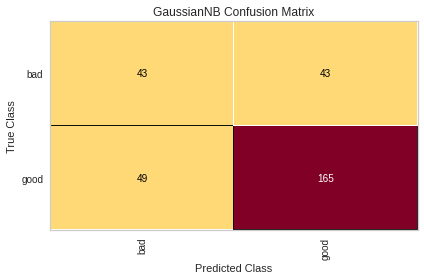

In [ ]:
y_pred = naive_bayes.predict(X_test)
taxa_acerto = accuracy_score(y_test, y_pred)
taxas_acertos.append(taxa_acerto)
print('Taxa de acerto', taxa_acerto,'%')
v = ConfusionMatrix(GaussianNB())
v.fit(x_train, y_train)
v.score(X_test, y_test)
v.poof()

Text(0.5, 1.0, 'Taxa de acerto dos classificadores')

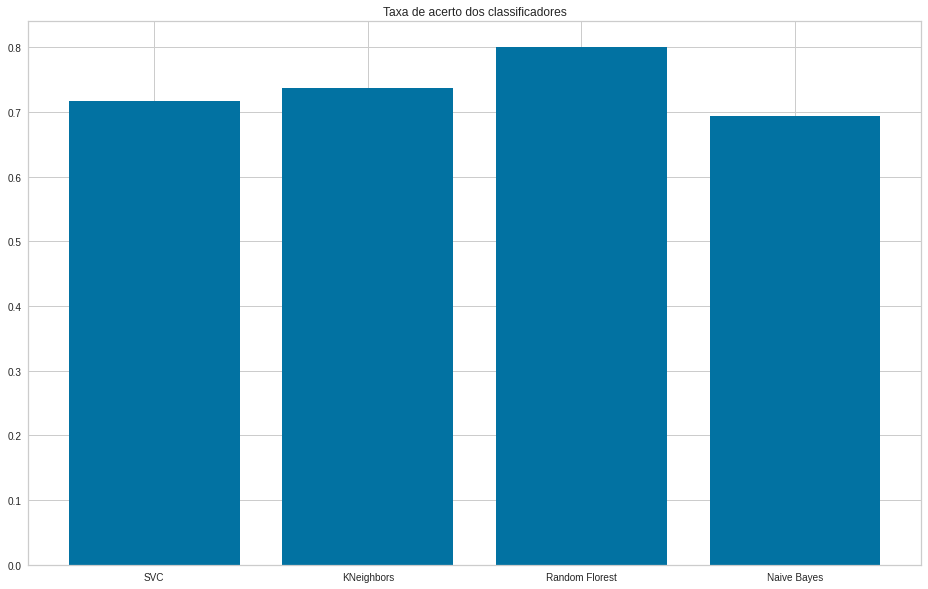

In [ ]:
classificadores = ['SVC', 'KNeighbors', 'Random Florest', 'Naive Bayes']
plt.figure(figsize=(16,10))
plt.bar(classificadores, taxas_acertos)
plt.title('Taxa de acerto dos classificadores')

**Conclusão**: <br>
Conforme é possível observar os classificadores implementados apresentaram taxas de acertos similares, porém o Random Florest foi o que apresentou o melhor resultado.